# Проект: Выявление и анализ закономерностей успешности компьютерных игр.

# План:

## Шаг 1. Открытие файла с данными и изучение общей информации

## Шаг 2. Подготовка и предобработка данных

### Замена названия столбцов (приведите к нижнему регистру);
### Преобразование данных в нужные типы. Описание, в каких столбцах заменили тип данных и почему;
### Обрабока пропусков при необходимости:
### Объяснение, почему заполнили пропуски определённым образом или почему не стали это делать;
### Описание причин, которые могли привести к пропускам;
### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
## Шаг 3. Проведение исследовательского анализа данных

### Анализ количества выпускаемых игр в разные годы;
### Просмотр изменения продаж по платформам. Выбор платформы с наибольшими суммарными продажами и построение распределения по годам. Определение характерного срока появления новых и исчезновения старых платформ
### Анализ платформ-лидиров по продажам, анализ их роста/падения?(несколько потенциально прибыльных платформ)
### Построение графика «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Анализ и описание результата
### Посмотр влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков. Построение диаграммы рассеяния и подсчет корреляции между отзывами и продажами.
### Выводы
### Соотношение выводов с продажами игр на других платформах.
### Посмотр общего распределения игр по жанрам. Что можно сказать о самых прибыльных жанрах? 
### Сравнения игр с высокими и низкими продажами
## Шаг 4. Составление портрета пользователя каждого региона

### Определение для пользователя каждого региона (NA, EU, JP):
### Самые популярные платформы (топ-5). Описание различия в долях продаж.
### Самые популярные жанры (топ-5). Объяснение разницы
## Шаг 5. Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
### Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.
## Шаг 6. Общий вывод

# Описание данных
## Name — название игры
## Platform — платформа
## Year_of_Release — год выпуска
## Genre — жанр игры
## NA_sales — продажи в Северной Америке (миллионы долларов)
## EU_sales — продажи в Европе (миллионы долларов)
## JP_sales — продажи в Японии (миллионы долларов)
## Other_sales — продажи в других странах (миллионы долларов)
## Critic_Score — оценка критиков (максимум 100)
## User_Score — оценка пользователей (максимум 10)
## Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# =============================================================

# Импортирование нужных библиотек

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

# **_Открытие файла с данными и изучение общей информации_**

In [68]:
games = pd.read_csv('games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [69]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [70]:
games['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [71]:
games['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [72]:
games['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

In [73]:
games['User_Score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.6       2
9.6       2
0.3       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

In [74]:
games['Critic_Score'].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: Critic_Score, Length: 82, dtype: int64

In [75]:
games.duplicated().sum()

0

### 1. *Обнаружены пропуски в столбцах 'Name'(2), 'Year_of_Release'(269), 'Genre'(2), 'Critic_Score'(8578), 'User_Score'(6701), 'Rating'(6766).*
### 2. *Столбец 'User_Score' имеет тип данных object, лучше его изменить в тип данных float64(поскольку оценка имеет числовой тип). Столбец 'Year_of_Release' следует привести к типу данных int(год целочисленен).*
### 3. *Нужно переименовать столбцы для большего удобства и понизить регистр.*
### 4. *Дупликаты не обнаружены.*
### 5. *Замечено странное значение tbd в столбце 'User_Score', следует понять что это и предпринять соответствующие меры по обработке значения.*

# **_Подготовка и предобработка данных_**

## Переименование столбцов

In [76]:
games.columns = [
    'name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score',
    'user_score', 'rating'
]

### *Так легче будет обращаться к названиям столбцов*.

## Обработка пропусков

In [77]:
games.dropna(subset=['name', 'year_of_release', 'genre'], inplace=True)

### *В столбцах 'name', 'year_of_release', 'genre', можно удалить строки, т.к. их количество << количества строк DataFrame'а. В столбцах 'critic_score', 'user_score', 'rating' пропусков около 50% DataFrame'а - достаточно много, поскольку их нельзя заполнить конкретными значениями(оценка этих игр на данных платформах неизвестна), то оставим пропуски пустыми(даже если заполнить пропуски значениями этой игры на других платформах - это помешает точности анализа по платформам, так что лучше пропуски просто не трогать). Пропуски в столбцах 'name', 'year_of_release', 'genre' вероятно имеются из-за сбоев при загрузке данных, поскольку в основном эти столбцы загрузились, в столбцах 'critic_score', 'user_score', 'rating' есть пропуски возможно из-за неуказания оценок пользователей и экспертов, однако могут быть и сбои при загрузке данных, точно сказать нельзя.*

### *Если понадобится заполнить/удалить пропуски, это будет делаться походу работы.*

## Замена типов данных

In [78]:
games['year_of_release'] = games['year_of_release'].astype('int')
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### *Так будут проще восприниматься числа для анализа данных.*

## tbd - значение

In [79]:
games[games['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E


In [80]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

### *С английского tbd - "будет определен позднее", возможно это означает, что оценка за игру ещё не была выставлена, то есть игры ещё не сильно развиты(это подтверждает то, что кассовые сборы по ним достаточно маленькие) с учетом этого заменим это значение на NaN, потому что однозначно определить его нельзя.*

## Подсчет продаж по всем регионам

In [81]:
def sales(row):
    return row[4] + row[5] + row[6] + row[7]


games['all_sales'] = games.apply(sales, axis=1)

# Исследовательский анализ данных

## Количество игр по годам

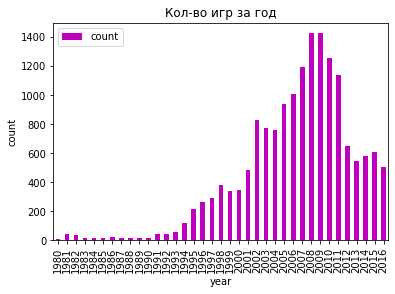

In [82]:
games_year_count = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_year_count.columns = ['count']
games_year_count.plot(y='count', kind='bar', color='m')
plt.xlabel('year')
plt.ylabel('count')
plt.title('Кол-во игр за год')
plt.show()

### *Не сложно заметить, что до определенного года игр произодилось очень мало(этот промежуток можно описать редкостью компьютера, как дорогого по тем временам устройства, малым количеством программистов и непопулярностью новой индустрии), далее кол-во игр линейно росло до определенного значения(игры начали набирать популярность, как новый тип отдыха), далее спад и равномерность значения кол-ва игр(вероятно объясняется качеством игр, когда их по-настоящем начали ценить, за деньгами игровые компании спешить перестали, а стали выпускать более качественные игры). Для предсказания данных за 2017 год не понадобятся данные меньше, чем за некоторый определенный год, поэтому нужно определить этот критический год.*

## Суммарные продажи по платформам за разные года

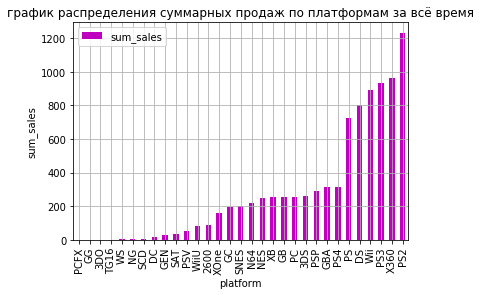

In [83]:
platform_sales = games.pivot_table(index='platform', values='all_sales', aggfunc='sum')
platform_sales.columns = ['sum_sales']
platform_sales = platform_sales.sort_values(by=['sum_sales'], ascending=True)
platform_sales.plot(y='sum_sales', kind='bar', color='m', grid=True)
plt.xlabel('platform')
plt.ylabel('sum_sales')
plt.title('график распределения суммарных продаж по платформам за всё время')
plt.show()

## Выберем первые 5 самых популярных платформ и проанализируем продажи за каждый год по ним отдельно.

### Платформа PS2

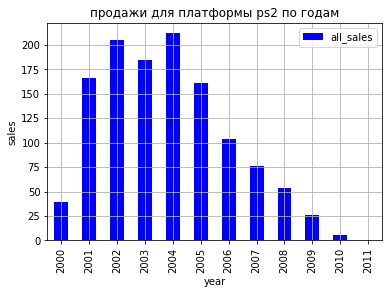

In [84]:
ps2_sales = games.query('platform == "PS2"').pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
ps2_sales.plot(y='all_sales', kind='bar', grid=True, color='b')
plt.xlabel('year')
plt.ylabel('sales')
plt.title('продажи для платформы ps2 по годам')
plt.show()

### Платформа X360

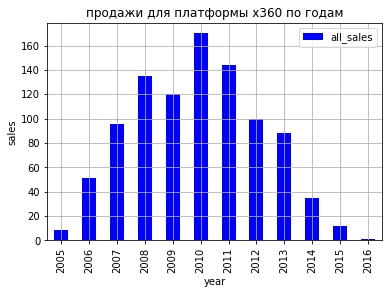

In [85]:
x360_sales = games.query('platform == "X360"').pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
x360_sales.plot(y='all_sales', kind='bar', grid=True, color='b')
plt.xlabel('year')
plt.ylabel('sales')
plt.title('продажи для платформы x360 по годам')
plt.show()

### Платформа PS3

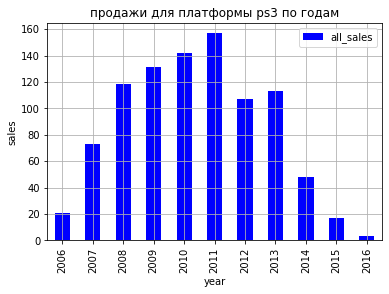

In [86]:
ps3_sales = games.query('platform == "PS3"').pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
ps3_sales.plot(y='all_sales', kind='bar', grid=True, color='b')
plt.xlabel('year')
plt.ylabel('sales')
plt.title('продажи для платформы ps3 по годам')
plt.show()

### Платформа Wii

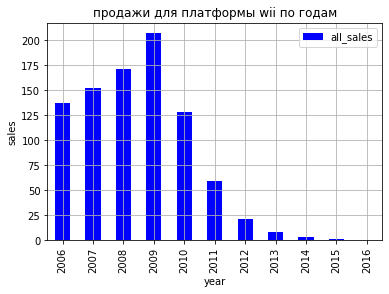

In [87]:
wii_sales = games.query('platform == "Wii"').pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
wii_sales.plot(y='all_sales', kind='bar', grid=True, color='b')
plt.xlabel('year')
plt.ylabel('sales')
plt.title('продажи для платформы wii по годам')
plt.show()

### Платформа DS

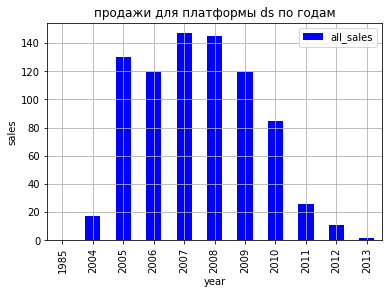

In [88]:
ds_sales = games.query('platform == "DS"').pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
ds_sales.plot(y='all_sales', kind='bar', grid=True, color='b')
plt.xlabel('year')
plt.ylabel('sales')
plt.title('продажи для платформы ds по годам')
plt.show()

### *Пусть платформа считается 'живой', если количество продаж - более 50 миллионов долларов, тогда по анализу 5 самых популярных за всё время платформ можно сказать, что средний год жизни платформы: 7 лет, далее продажи игр на данных платформах резко падают.*

### *Возьмём для анализа данные за последние 6 лет(с запасом), то есть диапазон - [2011, 2016] года, как актуальный для 2017 года период.

## Суммарные продажи по платформам за 2011 - 2016 годы

In [89]:
games_now = games[(games['year_of_release'] >= 2011) & (games['year_of_release'] <= 2016)]
platform_sales_now = games_now.pivot_table(index='platform', values='all_sales', aggfunc='sum')
platform_sales_now.columns = ['sales']
platform_sales_now = platform_sales_now.sort_values(by=['sales'], ascending=False)
platform_sales_now.head(5)

,sales
platform,
PS3,445.57
X360,380.38
PS4,314.14
3DS,257.81
XOne,159.32


## Выберем первые 5 самых прибыльных платформ и проанализируем продажи за каждый год по ним отдельно

### Платформа PS3

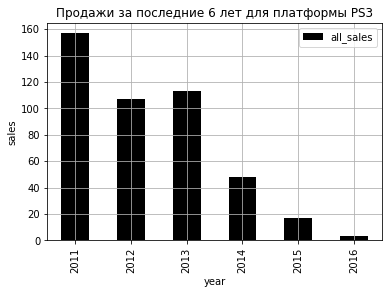

In [90]:
games_now_ps3 = games_now[games_now['platform'] == 'PS3']
ps3_sales = games_now_ps3.pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
ps3_sales.plot(y='all_sales', kind='bar', grid=True, color='k')
plt.xlabel('year')
plt.ylabel('sales')
plt.title('Продажи за последние 6 лет для платформы PS3')
plt.show()

### Платформа X360

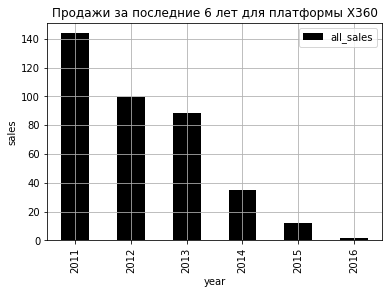

In [91]:
games_now_x360 = games_now[games_now['platform'] == 'X360']
x360_sales = games_now_x360.pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
x360_sales.plot(y='all_sales', kind='bar', grid=True, color='k')
plt.xlabel('year')
plt.ylabel('sales')
plt.title('Продажи за последние 6 лет для платформы X360')
plt.show()

### Платформа PS4

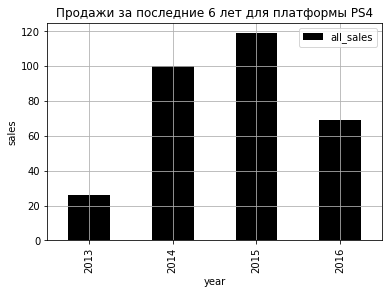

In [92]:
games_now_ps4 = games_now[games_now['platform'] == 'PS4']
ps4_sales = games_now_ps4.pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
ps4_sales.plot(y='all_sales', kind='bar', grid=True, color='k')
plt.xlabel('year')
plt.ylabel('sales')
plt.title('Продажи за последние 6 лет для платформы PS4')
plt.show()

### Платформа 3DS

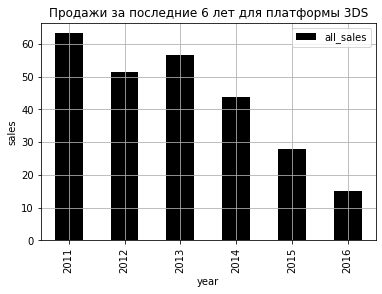

In [93]:
games_now_3ds = games_now[games_now['platform'] == '3DS']
ds3_sales = games_now_3ds.pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
ds3_sales.plot(y='all_sales', kind='bar', grid=True, color='k')
plt.xlabel('year')
plt.ylabel('sales')
plt.title('Продажи за последние 6 лет для платформы 3DS')
plt.show()

### Платформа XOne

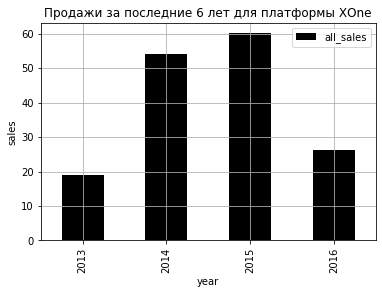

In [94]:
games_now_xone = games_now[games_now['platform'] == 'XOne']
xone_sales = games_now_xone.pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
xone_sales.plot(y='all_sales', kind='bar', grid=True, color='k')
plt.xlabel('year')
plt.ylabel('sales')
plt.title('Продажи за последние 6 лет для платформы XOne')
plt.show()

### *Нетрудно заметить, что некоторые популярные платформы, такие как PS3, X360, 3DS - были популярны раньше, но к 2016 году почти не имеют продаж, то есть устарели, а такие как PS4 и XOne - наоборот набирают обороты к популярности(2016 год - не конец 2016 года, а видимо где-то первые 3 - 4 месяца).*

## Построим диаграмму разброса продаж для популярных платформ, используемых в период с 2011 - 2016 года

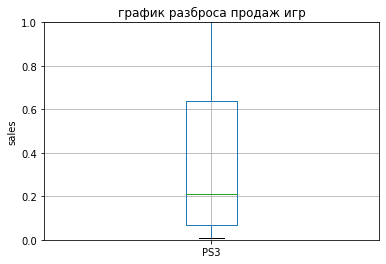

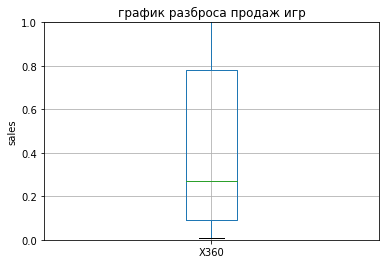

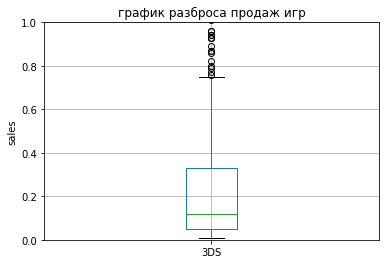

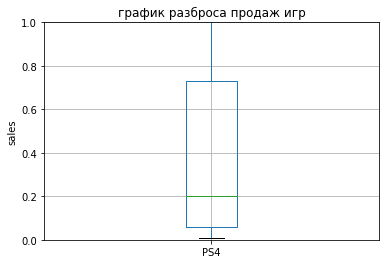

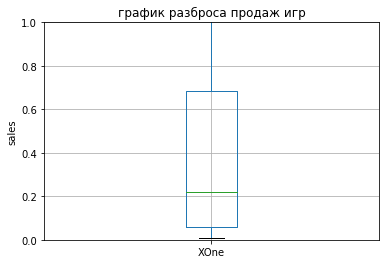

In [95]:
games_platform_sales = games_now.pivot_table(index='name', columns='platform', values='all_sales', aggfunc='sum')
platforms = ['PS3', 'X360', '3DS', 'PS4', 'XOne']
for platform in platforms:
    games_platform_sales.boxplot(column=platform)
    plt.ylim(0, 1)
    plt.ylabel('sales')
    plt.title('график разброса продаж игр')
    plt.show()

### *Из графиков можно заметить, что в среднем(по медиане) игра собирает где-то 0.2 миллионов долларов для платформ в целом, но есть платформы, такие как 3DS где и медиана и диапазон сборов денег в целом достаточно мал, то есть платформа не такая популярная, а для платформ PS3, X360, PS4, XOne - диапазон значений может достигать верхней грани в 0.6 - 0.8 миллионов долларов, что говорит о популярности таких игр на данной платформе и соответственно о популярности платформы в целом.*

## Анализ влияния на продажи платформы PS3 отзывов пользователей

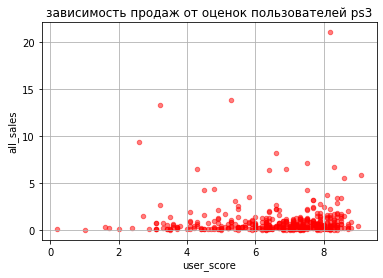

Корреляция: 0.014089348308019395


In [96]:
games_now_ps3 = games_now[games_now['platform'] == 'PS3']
games_now_ps3.plot(x='user_score', y='all_sales', kind='scatter', legend=True, grid=True, alpha=0.5, color='r')
plt.title('зависимость продаж от оценок пользователей ps3')
plt.show()
print('Корреляция:', games_now_ps3['all_sales'].corr(games_now_ps3['user_score']))

## Анализ влияния на продажи платформы PS3 отзывов критиков

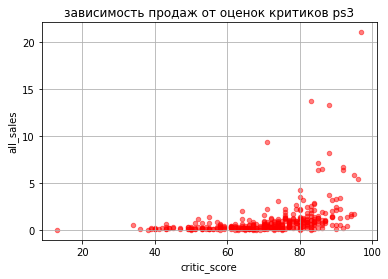

Корреляция: 0.3801111471829076


In [97]:
games_now_ps3.plot(x='critic_score', y='all_sales', kind='scatter', legend=True, grid=True, alpha=0.5, color='r')
plt.title('зависимость продаж от оценок критиков ps3')
plt.show()
print('Корреляция:', games_now_ps3['all_sales'].corr(games_now_ps3['critic_score']))

## Анализ влияния на продажи платформы X360 отзывов пользователей

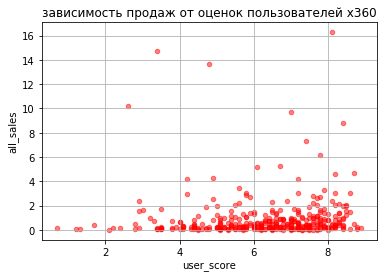

Корреляция: 0.038918170729102544


In [98]:
games_now_x360 = games_now[games_now['platform'] == 'X360']
games_now_x360.plot(x='user_score', y='all_sales', kind='scatter', legend=True, grid=True, alpha=0.5, color='r')
plt.title('зависимость продаж от оценок пользователей x360')
plt.show()
print('Корреляция:', games_now_x360['all_sales'].corr(games_now_x360['user_score']))

## Анализ влияния на продажи платформы X360 отзывов критиков

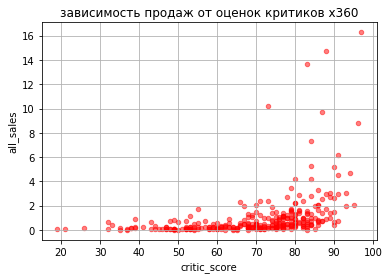

Корреляция: 0.3912533245484558


In [99]:
games_now_x360.plot(x='critic_score', y='all_sales', kind='scatter', legend=True, grid=True, alpha=0.5, color='r')
plt.title('зависимость продаж от оценок критиков x360')
plt.show()
print('Корреляция:', games_now_x360['all_sales'].corr(games_now_x360['critic_score']))

## Анализ влияния на продажи платформы PS4 отзывов пользователей

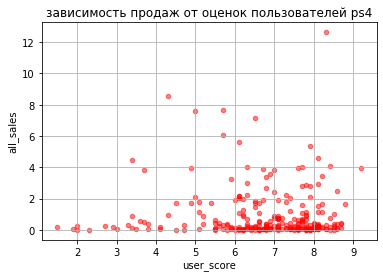

Корреляция: -0.031957110204556376


In [100]:
games_now_ps4 = games_now[games_now['platform'] == 'PS4']
games_now_ps4.plot(x='user_score', y='all_sales', kind='scatter', legend=True, grid=True, alpha=0.5, color='r')
plt.title('зависимость продаж от оценок пользователей ps4')
plt.show()
print('Корреляция:', games_now_ps4['all_sales'].corr(games_now_ps4['user_score']))

## Анализ влияния на продажи платформы PS4 отзывов критиков

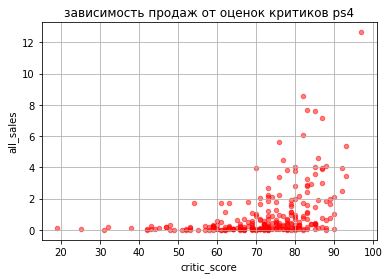

Корреляция: 0.406567902061781


In [101]:
games_now_ps4.plot(x='critic_score', y='all_sales', kind='scatter', legend=True, grid=True, alpha=0.5, color='r')
plt.title('зависимость продаж от оценок критиков ps4')
plt.show()
print('Корреляция:', games_now_ps4['all_sales'].corr(games_now_ps4['critic_score']))

### *Как можно видеть зависимость продаж от отзывов пользователей или критиков нелинейна, однако по графикам можно видеть, что при увеличении оценки, что пользователей, что критиков продажи игры увеличиваются, но прямой зависимости естественно между этим нету. В основном игры имеют оценку [60, 90] для критиков и [6, 9] для пользователей, поэтому сам по себе критерий не очень показательный, оттого и разброс достаточно большой и соответственно маленькая корреляция.*

## Анализ игр по жанрам

In [102]:
# Сортировка по общим сборам
games_genre = games_now.pivot_table(index='genre', values='all_sales', aggfunc=['sum', 'count'])
games_genre.columns = ['sales', 'count']
games_genre['sales_on_count'] = games_genre['sales'] / games_genre['count']
games_genre = games_genre.sort_values(by='sales', ascending=False)
games_genre

,sales,count,sales_on_count
genre,,,
Action,557.80,1269,0.439559
Shooter,402.91,329,1.224650
Role-Playing,245.63,465,0.528237
Sports,237.15,389,0.609640
Misc,139.42,375,0.371787
Platform,88.68,122,0.726885
Racing,88.31,180,0.490611
Fighting,66.90,159,0.420755
Simulation,50.26,136,0.369559


In [103]:
# Сортировка по количеству выпущенных игр
games_genre = games_genre.sort_values(by='count', ascending=False)
games_genre

,sales,count,sales_on_count
genre,,,
Action,557.80,1269,0.439559
Role-Playing,245.63,465,0.528237
Adventure,45.04,410,0.109854
Sports,237.15,389,0.609640
Misc,139.42,375,0.371787
Shooter,402.91,329,1.224650
Racing,88.31,180,0.490611
Fighting,66.90,159,0.420755
Simulation,50.26,136,0.369559


In [104]:
# Сортировка по средним сборам на одну игру
games_genre = games_genre.sort_values(by='sales_on_count', ascending=False)
games_genre

,sales,count,sales_on_count
genre,,,
Shooter,402.91,329,1.224650
Platform,88.68,122,0.726885
Sports,237.15,389,0.609640
Role-Playing,245.63,465,0.528237
Racing,88.31,180,0.490611
Action,557.80,1269,0.439559
Fighting,66.90,159,0.420755
Misc,139.42,375,0.371787
Simulation,50.26,136,0.369559


### *Больше всего сборов по жанрам - Action, Shooter, Role-Playing, Sports; меньше всего по жанрам - Simulation, Adventure, Strategy и Puzzle. Как можно видеть из анализа популярность жанра определяется двумя критериями - количеством выпущенных игр по данном жанру и среднему сбору по каждой игре. Так например жанр Action имеет очень много игр, но их средние сборы - 0.44 млн. долларов, а следующий по популярности жанр Shooter имеет в 4 раза меньше игр, но  3 раза больше сборов по игре, и всё равно расположен на второй строчке по популярности. Так жанр Adventure имеет 410 созданных игр, что занимает 3 строчку по количеству, но имеет сборы на игр лишь 0.11 млн. долларов, что в итоге сделало его одним из самых непопулярных жанров, а жанр Platform имеет сборы за игру - 0.73 млн. долларов, но по нему выпущено всего лишь 122 игры, что также не делает жанр популярным по сборам.*

# Портрет пользователя каждого региона

## Топ 5 самых популярных платформ для различных регионов

### Северная Америка

In [105]:
games_sales_na = games_now.pivot_table(index='platform', values='na_sales', aggfunc=['sum', 'count'])
games_sales_na.columns = ['sum_sales', 'count_sales']
games_sales_na['sum_on_count'] = games_sales_na['sum_sales'] / games_sales_na['count_sales']
games_sales_na = games_sales_na.sort_values(by='sum_on_count', ascending=False)
games_sales_na.head()

,sum_sales,count_sales,sum_on_count
platform,,,
X360,226.80,498,0.455422
XOne,93.12,247,0.377004
PS4,108.74,392,0.277398
WiiU,38.10,147,0.259184
Wii,48.56,197,0.246497


### Европа

In [106]:
games_sales_eu = games_now.pivot_table(index='platform', values='eu_sales', aggfunc=['sum', 'count'])
games_sales_eu.columns = ['sum_sales', 'count_sales']
games_sales_eu['sum_on_count'] = games_sales_eu['sum_sales'] / games_sales_eu['count_sales']
games_sales_eu = games_sales_eu.sort_values(by='sum_on_count', ascending=False)
games_sales_eu.head()

,sum_sales,count_sales,sum_on_count
platform,,,
PS4,141.09,392,0.359923
X360,117.10,498,0.235141
PS3,163.10,708,0.230367
XOne,51.59,247,0.208866
WiiU,25.13,147,0.170952


### Япония

In [107]:
games_sales_jp = games_now.pivot_table(index='platform', values='jp_sales', aggfunc=['sum', 'count'])
games_sales_jp.columns = ['sum_sales', 'count_sales']
games_sales_jp['sum_on_count'] = games_sales_jp['sum_sales'] / games_sales_jp['count_sales']
games_sales_jp = games_sales_jp.sort_values(by='sum_on_count', ascending=False)
games_sales_jp.head()

,sum_sales,count_sales,sum_on_count
platform,,,
3DS,100.62,512,0.196523
WiiU,13.01,147,0.088503
PSP,24.04,312,0.077051
PS3,49.39,708,0.069760
PSV,21.84,429,0.050909


### *По сборам за игру в Северной Америке лидируют платформы - X360, XOne, PS4, WiiU, Wii. В Европе - PS4, X360, PS3, XOne, WiiU. В Японии - 3DS, WiiU, PSP, PS3, PSV. В Японии все новые платформы(PS4, XOne) доходят с опозданием или население не способно потратить такие деньги на платформу после её недавнего выхода. В Европе и Америке наоборот новые платформы(PS4, XOne) сразу занимают хорошие позиции в долях продаж на игру.*

## Топ 5 самых популярных жанров для различных регионов

### Северная Америка

In [108]:
games_genre_na = games_now.pivot_table(index='genre', values='na_sales', aggfunc=['sum', 'count'])
games_genre_na.columns = ['sales_sum', 'sales_count']
games_genre_na['sum_on_count'] = games_genre_na['sales_sum'] / games_genre_na['sales_count']
games_genre_na = games_genre_na.sort_values(by='sales_sum', ascending=False)
games_genre_na.head()

,sales_sum,sales_count,sum_on_count
genre,,,
Action,230.92,1269,0.181970
Shooter,194.43,329,0.590973
Sports,108.70,389,0.279434
Role-Playing,83.78,465,0.180172
Misc,69.69,375,0.185840


### Европа

In [109]:
games_genre_eu = games_now.pivot_table(index='genre', values='eu_sales', aggfunc=['sum', 'count'])
games_genre_eu.columns = ['sales_sum', 'sales_count']
games_genre_eu['sum_on_count'] = games_genre_eu['sales_sum'] / games_genre_eu['sales_count']
games_genre_eu = games_genre_eu.sort_values(by='sales_sum', ascending=False)
games_genre_eu.head()

,sales_sum,sales_count,sum_on_count
genre,,,
Action,199.12,1269,0.156911
Shooter,148.02,329,0.449909
Sports,88.48,389,0.227455
Role-Playing,62.30,465,0.133978
Racing,40.58,180,0.225444


### Япония

In [110]:
games_genre_jp = games_now.pivot_table(index='genre', values='jp_sales', aggfunc=['sum', 'count'])
games_genre_jp.columns = ['sales_sum', 'sales_count']
games_genre_jp['sum_on_count'] = games_genre_jp['sales_sum'] / games_genre_jp['sales_count']
games_genre_jp = games_genre_jp.sort_values(by='sales_sum', ascending=False)
games_genre_jp.head()

,sales_sum,sales_count,sum_on_count
genre,,,
Role-Playing,79.87,465,0.171763
Action,63.62,1269,0.050134
Misc,17.60,375,0.046933
Fighting,12.38,159,0.077862
Platform,12.13,122,0.099426


### *По общим сборам денег самые популярные жанры в Северной Америке - Action, Shooter, Sports, Role-Playing, Misc. В Европе - Action, Shooter, Sports, Role-Playing, Racing. В Японии - Role-Playing, Action, Misc, Fighting, Platform. Опять в Японии количество сборов больше на жанры, которые в Европе или Северной Америке не настолько распространены, шутеры и спорт-игры даже не входят в топ 5 популярных игр, зато вместо них можно найти игры жанров Fighting и Platform. В Европе и Северной Америке интересы игроков примерно совпадают.*

# Влияение рейтинга ERSB на продажи по регионам

### Северная Америка

In [111]:
games_rating_na = games_now.pivot_table(index='rating', values='na_sales', aggfunc=['sum', 'count'])
games_rating_na.columns = ['sum_sales', 'count_sales']
games_rating_na['sum_on_count'] = games_rating_na['sum_sales'] / games_rating_na['count_sales']
games_rating_na = games_rating_na.sort_values(by='sum_sales', ascending=False)
games_rating_na.head(4)

,sum_sales,count_sales,sum_on_count
rating,,,
M,308.45,622,0.495900
E,170.17,618,0.275356
E10+,117.72,456,0.258158
T,109.31,616,0.177451


### Европа

In [112]:
games_rating_eu = games_now.pivot_table(index='rating', values='eu_sales', aggfunc=['sum', 'count'])
games_rating_eu.columns = ['sum_sales', 'count_sales']
games_rating_eu['sum_on_count'] = games_rating_eu['sum_sales'] / games_rating_eu['count_sales']
games_rating_eu = games_rating_eu.sort_values(by='sum_sales', ascending=False)
games_rating_eu.head(4)

,sum_sales,count_sales,sum_on_count
rating,,,
M,250.26,622,0.402347
E,141.73,618,0.229337
T,83.16,616,0.135000
E10+,78.00,456,0.171053


### Япония

In [113]:
games_rating_jp = games_now.pivot_table(index='rating', values='jp_sales', aggfunc=['sum', 'count'])
games_rating_jp.columns = ['sum_sales', 'count_sales']
games_rating_jp['sum_on_count'] = games_rating_jp['sum_sales'] / games_rating_jp['count_sales']
games_rating_jp = games_rating_jp.sort_values(by='sum_sales', ascending=False)
games_rating_jp.head(4)

,sum_sales,count_sales,sum_on_count
rating,,,
E,36.68,618,0.059353
T,33.39,616,0.054205
M,26.14,622,0.042026
E10+,11.23,456,0.024627


### *Для Северной Америки и Европы игры по популярности рейтинга расположены примерно в таком порядке: M(для взрослых, лицам старше 17 лет), E(для всех, старше 6 лет), T(для подростков, лиц старше 13 лет) = E10+(для всех, старше 10 лет). В Японии же порядок популярности по возрастным ограничения таков: E(старше 6 лет), T(старше 13 лет), M(старше 17 лет), E10+(старше 10 лет). Иначе говоря игры с возрастным ограничением в 17+ распространены намного меньше, чем игры 6+ и 13+, о чем не скажешь для игроков в Европе или Северной Америке. Наверняка это связано с менталитетом Японцев, опять их культура и традиции не позволяют им играть в игры 17+, возможно это также связано со средней женоподобностью среди мужчин.*

# Проверка Гипотез

## Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Возьмём за нулевую гипотезу - исходную. Пороговое значение alpha возьмём равным 5% и проверим нулевую гипотезу, как гипотезу равенства генеральных совокупностей по исходным выборкам, альтернативная гипотеза - средние пользовательские рейтинги данных платформ различаются.

In [114]:
games_now.head()
games_user_score_xbox = games_now[games_now['platform'] == 'XOne']['user_score'].dropna().tolist()
games_user_score_pc = games_now[games_now['platform'] == 'PC']['user_score'].dropna().tolist()
alpha = 0.05
results = st.ttest_ind(games_user_score_xbox, games_user_score_pc, equal_var=False)
print('p-значение:', results.pvalue)
if (alpha >= results.pvalue):
    print('Первая гипотеза неверна с точностью до уровня значимости в 5%')
else:
    print('Первая гипотеза верна с точностью до уровня значимости в 5%')

p-значение: 0.6130712247638477
Первая гипотеза верна с точностью до уровня значимости в 5%


### *p-value = 61.3%, что говорит о том, что средние пользовательские рейтинги действительно примерно одинаковые и с большой точностью можно принять гипотезу 1.*

## Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sport различные.

### Возьмём за нулевую гипотезу равенство средних пользовательских рейтингов этих жанров, а альтернативную - искомую гипотезу(средние пользовательские рейтинги жанров Action и Sport различные) и проверим по исходной выборке вероятность для генеральной совокупности. Пороговое значение принятия/отторжения гипотезы возьмём равным 5%.

In [115]:
games_user_score_action = games_now[games_now['genre'] == 'Action']['user_score'].dropna().tolist()
games_user_score_sport = games_now[games_now['genre'] == 'Sports']['user_score'].dropna().tolist()
alpha = 0.05
results = st.ttest_ind(games_user_score_action, games_user_score_sport, equal_var=False)
print('p-значение:', results.pvalue)
if (alpha >= results.pvalue):
    print('Первая гипотеза верна с точностью до уровня значимости в 5%')
else:
    print('Первая гипотеза неверна с точностью до уровня значимости в 5%')

p-значение: 8.285648549432565e-19
Первая гипотеза верна с точностью до уровня значимости в 5%


### *p-value = 8.3 * 10^(-19) крайне мало следовательно вероятность совпадения средних пользовательских оценок для жанров Action и Sport ничтожно малы, а значит исходная гипотеза 2 - средние пользовательские рейтинги жанров Action и Sport различные также верна с точностью до уровня значимости в 5%.*

# Заключение:

## Средний год жизни платформы - 7 лет, далее платформа становится непопулярной и продажи игр на ней резко снижаются. 

## Самые популярные платформы за всё время - PS2(1200 млн.дол.), X360(960 млн.дол.), PS3(920 млн.дол.),Wii(880 млн.дол.) ,DS(800 млн.дол.).

## Актуальный период - [2011, 2016] годы для анализа к 2017 году.

## Самые популярные платформы на этот период: PS3(450 млн.дол.), X360(380 млн.дол.), PS4(310 млн.дол.), 3DS(250 млн.дол.), XOne(150).

## Платформы PS3, X360, 3DS - были популярны раньше, но к 2016 году  устарели, платформы PS4 и XOne - наоборот набирают обороты к популярности.

## В среднем(по медиане) игра собирает где-то 0.2 миллионов долларов для платформ в целом. Платформа была 3DS не такая популярная, диапазон её сборов за игру до 0.4 млн. дол., а для платформ PS3, X360, PS4, XOne - диапазон значений может достигать верхней грани в 0.6 - 0.8 млн.дол..

## Зависимость продаж от отзывов пользователей или критиков нелинейна, однако при увеличении оценки, что пользователей, что критиков продажи игры увеличиваются. В основном игры имеют оценку [60, 90] для критиков и [6, 9] для пользователей, поэтому сам по себе критерий не показательный.

## Больше всего сборов по жанрам - Action, Shooter, Role-Playing, Sports; меньше всего по жанрам - Simulation, Adventure, Strategy и Puzzle. Больше всего игр выпущено по жанрам: Action(1269), Role-Playing(465), Adventure(410); меньше всего: Platform(122), Strategy(117), Puzzle(71). Самая большая средняя выручка за игру по жанрам: Shooter(1.22 млн. дол.), Platform(0.73 млн.дол.), Sports(0.61 млн.дол.), самая маленькая по жанрам: Strategy(0.19 млн.дол.), Puzzle(0.14 млн.дол.), Adventure(0.11 млн.дол.).

## По сборам за игру в Северной Америке лидируют платформы - X360, XOne, PS4, WiiU, Wii. В Европе - PS4, X360, PS3, XOne, WiiU. В Японии - 3DS, WiiU, PSP, PS3, PSV. В Японии все новые платформы(PS4, XOne) доходят с опозданием или население не способно потратить такие деньги на платформу после её недавнего выхода. В Европе и Америке наоборот новые платформы(PS4, XOne) сразу занимают хорошие позиции в долях продаж на игру.

## По общим сборам денег самые популярные жанры в Северной Америке - Action, Shooter, Sports, Role-Playing, Misc. В Европе - Action, Shooter, Sports, Role-Playing, Racing. В Японии - Role-Playing, Action, Misc, Fighting, Platform. В Европе и Северной Америке интересы игроков примерно совпадают. В Японии количество сборов больше на жанры, которые в Европе или Северной Америке не настолько распространены. Шутеры и спорт-игры более популярны среди Европейцев и жителей Северной Америке, а для японцев популярны жанры Fighting и Platform.

## Для Северной Америки и Европы игры по популярности рейтинга расположены примерно в таком порядке: M(для взрослых, лицам старше 17 лет), E(для всех, старше 6 лет), T(для подростков, лиц старше 13 лет) = E10+(для всех, старше 10 лет). В Японии же порядок популярности по возрастным ограничения таков: E(старше 6 лет), T(старше 13 лет), M(старше 17 лет), E10+(старше 10 лет). Иначе говоря игры с возрастным ограничением в 17+ распространены намного меньше, чем игры 6+ и 13+, о чем не скажешь для игроков в Европе или Северной Америке. Наверняка это связано с менталитетом Японцев, опять их культура и традиции не позволяют им играть в игры 17+, возможно это также связано со средней женоподобностью среди мужчин, средний показатель которой по Японии намного больше.

## Средние пользовательские рейтинги платформ Xbox One и PC приблизительно одинаковые.

## Средние пользовательские рейтинги жанров Action и Sport сильно различны.